In [1]:
# Import the libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Read the file
df = pd.read_csv("U.S._Chronic_Disease_Indicators__CDI_.csv")

In [3]:
# Find out the number of columns and rows
df.shape

(1185676, 34)

In [4]:
df.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,...,41,CVD,CVD1_4,NMBR,RACE,AIAN,NaN,NaN,NaN,NaN
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,59,ALC,ALC1_1,CRDPREV,RACE,ASN,NaN,NaN,NaN,NaN
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
5,2020,2020,AL,Alabama,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,1,ALC,ALC1_2,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN
6,2015,2015,DE,Delaware,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,10,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
7,2019,2019,FL,Florida,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,12,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
8,2018,2018,KS,Kansas,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,20,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
9,2013,2013,MS,Mississippi,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,28,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [5]:
df.info() # find out the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

### Data cleaning

In [6]:
df = df.drop(["StratificationID3", "StratificationCategoryID3", "StratificationID2", "StratificationCategoryID2", "ResponseID", "StratificationCategory2", "Stratification2", "StratificationCategory3", "Stratification3", "Response"], axis=1)


In [7]:
df = df.drop(columns=["DataValueFootnoteSymbol", "DatavalueFootnote", "TopicID", "QuestionID", "DataValueTypeID", "StratificationCategoryID1", "StratificationID1", "LocationID","HighConfidenceLimit","LowConfidenceLimit","DataValueAlt"],axis=1)


In [8]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,StratificationCategory1,Stratification1,GeoLocation
0,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,Number,30,Race/Ethnicity,American Indian or Alaska Native,POINT (-120.15503132599969 44.56744942400047)
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,29.5,Gender,Female,POINT (-111.76381127699972 34.865970280000454)
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,22.5,Gender,Male,POINT (-82.40426005599966 40.06021014100048)
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,13.9,Race/Ethnicity,"Asian, non-Hispanic",NaN
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,Gender,Male,POINT (-64.896335 18.335765)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,2020,WY,Wyoming,BRFSS,Diabetes,Dilated eye examination among adults aged >= 1...,%,Age-adjusted Prevalence,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048)
1185672,2020,2020,WY,Wyoming,BRFSS,Older Adults,Proportion of older adults aged >= 65 years wh...,%,Crude Prevalence,41.5,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048)
1185673,2017,2017,IA,Iowa,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,NaN,Race/Ethnicity,Hispanic,POINT (-93.81649055599968 42.46940091300047)
1185674,2020,2020,WY,Wyoming,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048)


In [9]:
(df.count()/len(df))*100  #calculating the percentage of non-null values


YearStart                  100.000000
YearEnd                    100.000000
LocationAbbr               100.000000
LocationDesc               100.000000
DataSource                 100.000000
Topic                      100.000000
Question                   100.000000
DataValueUnit               87.169935
DataValueType              100.000000
DataValue                   68.057547
StratificationCategory1    100.000000
Stratification1            100.000000
GeoLocation                 99.142599
dtype: float64

In [10]:
df = df.dropna(subset=["DataValue"])# droping the null values in datavalue column
df=df.dropna(subset=["DataValueUnit"])# droping the null values in datavalueunit column

In [11]:
(df.count()/len(df))*100


YearStart                  100.000000
YearEnd                    100.000000
LocationAbbr               100.000000
LocationDesc               100.000000
DataSource                 100.000000
Topic                      100.000000
Question                   100.000000
DataValueUnit              100.000000
DataValueType              100.000000
DataValue                  100.000000
StratificationCategory1    100.000000
Stratification1            100.000000
GeoLocation                 98.813882
dtype: float64

In [12]:
df.shape

(699340, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699340 entries, 1 to 1185675
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   YearStart                699340 non-null  int64 
 1   YearEnd                  699340 non-null  int64 
 2   LocationAbbr             699340 non-null  object
 3   LocationDesc             699340 non-null  object
 4   DataSource               699340 non-null  object
 5   Topic                    699340 non-null  object
 6   Question                 699340 non-null  object
 7   DataValueUnit            699340 non-null  object
 8   DataValueType            699340 non-null  object
 9   DataValue                699340 non-null  object
 10  StratificationCategory1  699340 non-null  object
 11  Stratification1          699340 non-null  object
 12  GeoLocation              691045 non-null  object
dtypes: int64(2), object(11)
memory usage: 74.7+ MB


# How has the prevalence of chronic diseases changed over time?


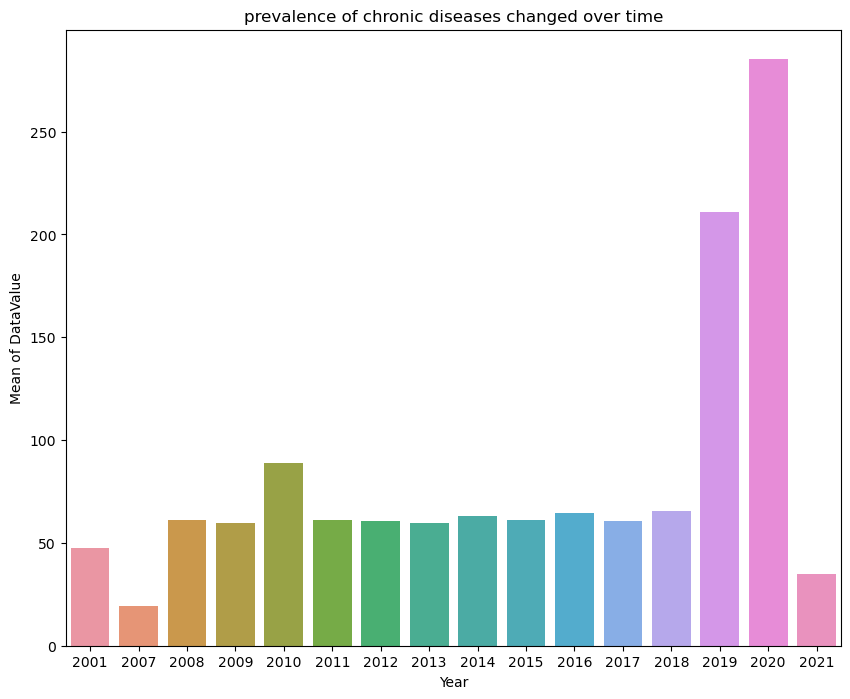

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the DataValue column to numeric
df["DataValue"] = pd.to_numeric(df["DataValue"], errors="coerce")
prevalence_by_year = df.groupby("YearStart")["DataValue"].mean()
fig = plt.figure(figsize=(10, 8))
sns.barplot(x=prevalence_by_year.index, y=prevalence_by_year.values)
plt.xlabel("Year")
plt.ylabel("Mean of DataValue")
plt.title("prevalence of chronic diseases changed over time")
plt.show()

# Finding out the count of each chronic disease


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

disease_counts = df['Topic'].value_counts()
disease_counts

Cardiovascular Disease                             91465
Cancer                                             90103
Diabetes                                           77649
Chronic Obstructive Pulmonary Disease              76231
Nutrition, Physical Activity, and Weight Status    63165
Overarching Conditions                             56361
Arthritis                                          54809
Alcohol                                            39939
Asthma                                             36710
Tobacco                                            36670
Oral Health                                        16945
Older Adults                                       15987
Chronic Kidney Disease                             14892
Mental Health                                      10716
Immunization                                        8949
Reproductive Health                                 5510
Disability                                          3239
Name: Topic, dtype: int64

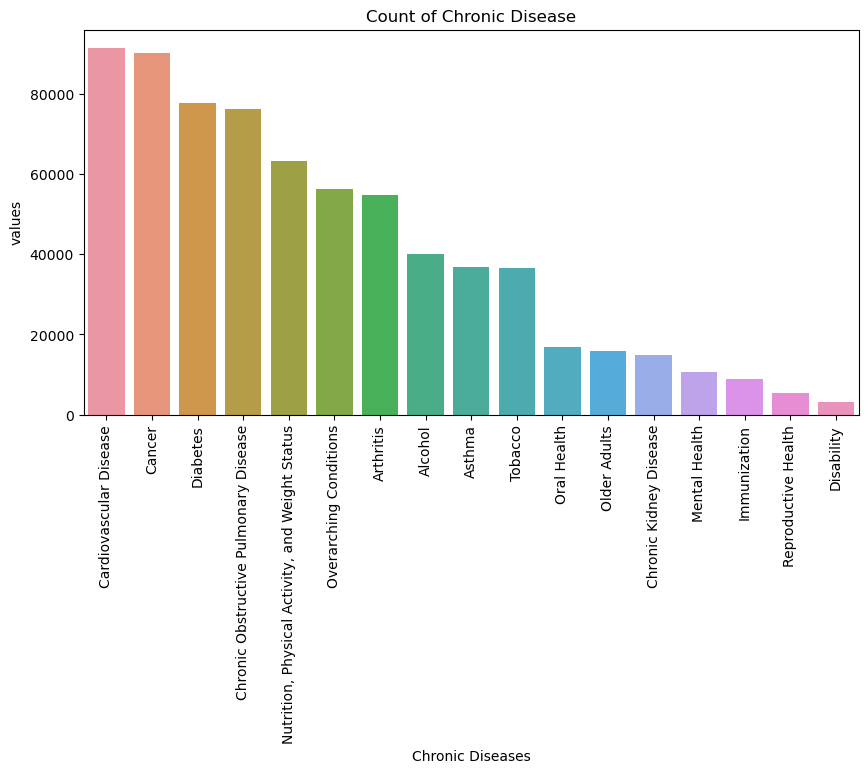

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x=disease_counts.index, y=disease_counts.values, order=disease_counts.index)
plt.xticks(rotation=90)
plt.xlabel('Chronic Diseases')
plt.ylabel('values')
plt.title('Count of Chronic Disease')
plt.show()


# Which type is highest prevelence rate in Cardiovascular Disease

In [18]:
cardiovascular_df = df[df['Topic'].str.contains('Cardiovascular Disease', case=False)]

prevalence_by_question = cardiovascular_df.groupby('Question')['DataValue'].mean()
prevalence_by_question

Question
Awareness of high blood pressure among adults aged >= 18 years                                                                   31.326667
Awareness of high blood pressure among women aged 18-44 years                                                                    15.381105
Cholesterol screening among adults aged >= 18 years                                                                              82.935140
High cholesterol prevalence among adults aged >= 18 years                                                                        32.430934
Hospitalization for acute myocardial infarction                                                                                  15.556434
Hospitalization for heart failure among Medicare-eligible persons aged >= 65 years                                               22.202698
Hospitalization for stroke                                                                                                       19.917982
Influenza vaccinat

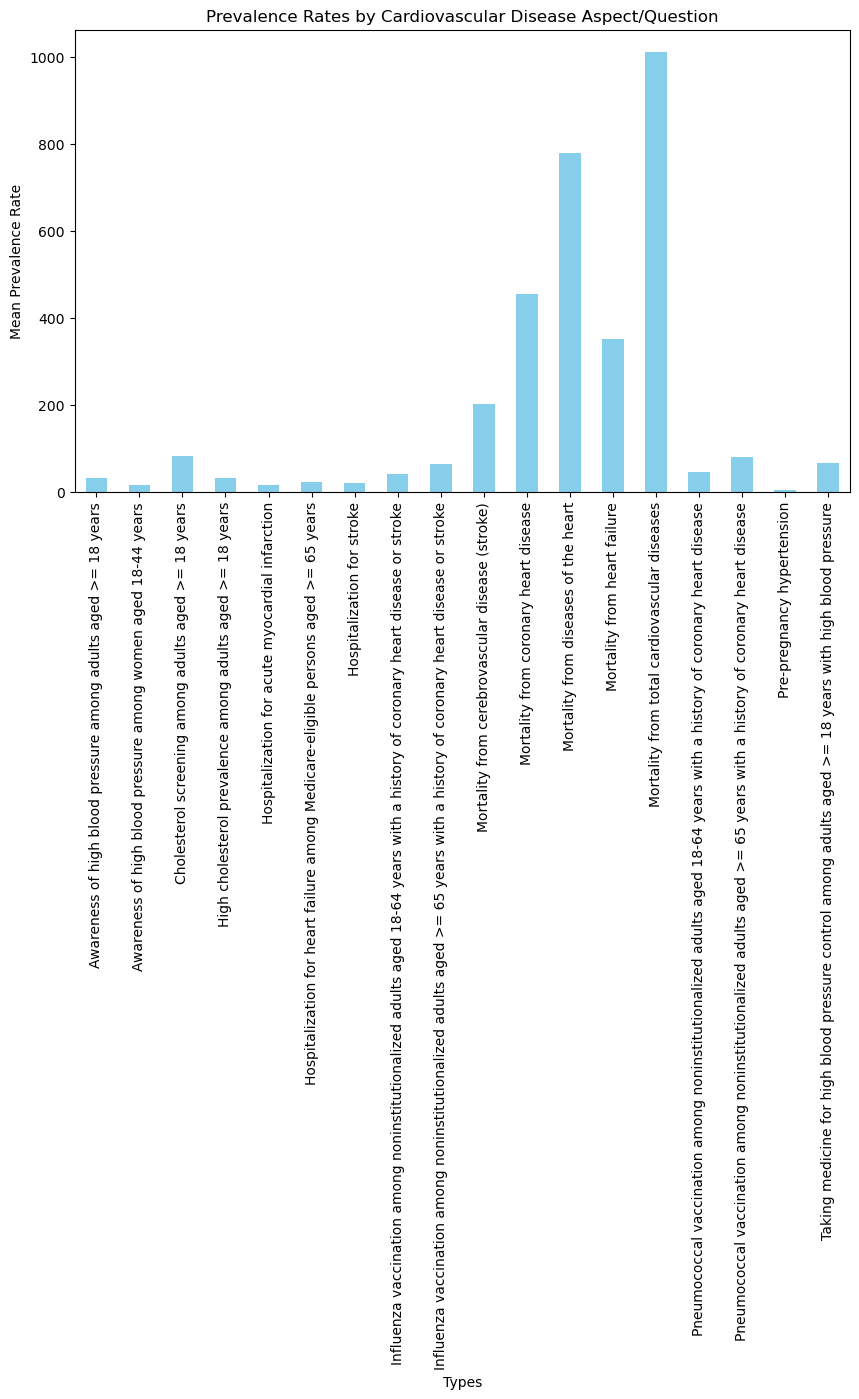

In [19]:
plt.figure(figsize=(10, 6))
prevalence_by_question.plot(kind='bar', color='skyblue')
plt.title('Prevalence Rates by Cardiovascular Disease Aspect/Question')
plt.xlabel('Types')
plt.ylabel('Mean Prevalence Rate')
plt.xticks(rotation=90)
plt.tight_layout()

# Which state has the highest prevalence of heart disease ?

In [20]:
heart_disease = df[(df["Topic"] == "Cardiovascular Disease") & (df["YearEnd"] >= 2001) & (df["YearEnd"] <= 2021)]
group_state = heart_disease.groupby("LocationDesc")["DataValue"].mean()
group_state = group_state.sort_values(ascending=False)
group_state = group_state.drop("United States")
group_state

LocationDesc
California              786.931284
Florida                 587.533705
Texas                   580.770589
New York                519.105861
Pennsylvania            458.133601
Ohio                    419.696202
Illinois                396.439187
Michigan                329.252500
Tennessee               297.965311
Georgia                 277.277058
New Jersey              267.348614
North Carolina          266.720224
Missouri                255.894510
Indiana                 253.727154
Alabama                 248.127567
Virginia                244.312348
Louisiana               212.869989
Oklahoma                207.556016
Kentucky                201.428863
Wisconsin               200.469357
Mississippi             196.732202
Arizona                 195.512924
South Carolina          194.721930
Massachusetts           193.137001
Maryland                191.300495
Washington              187.250393
Arkansas                182.124986
Iowa                    161.642869
West Vi

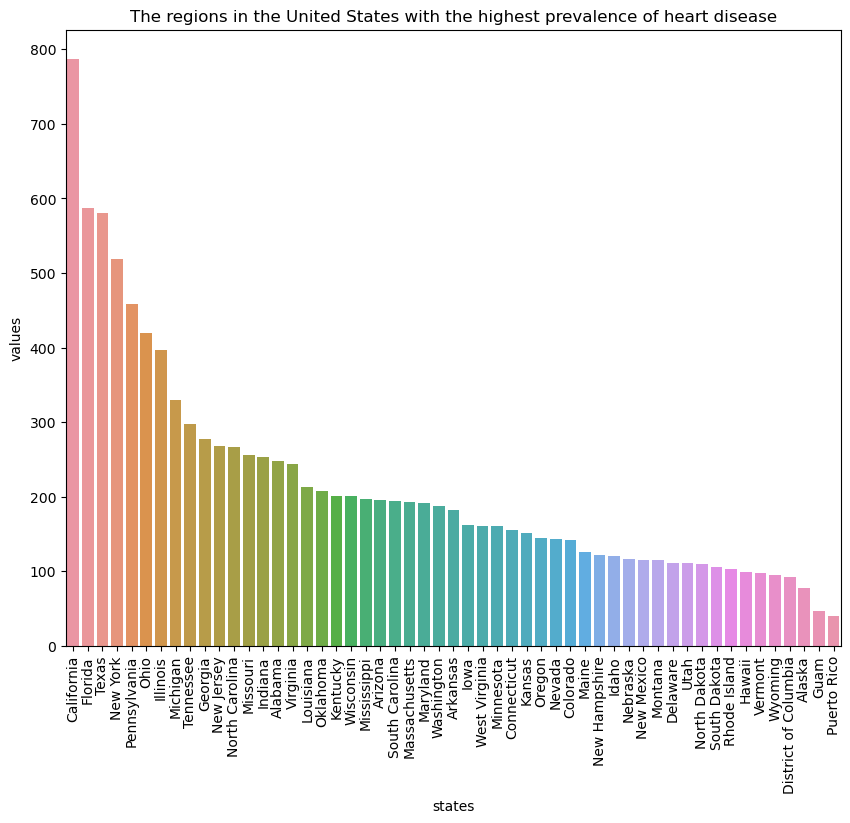

In [21]:
fig = plt.figure(figsize=(10, 8))

sns.barplot(x=group_state.index, y=group_state.values, order=group_state.index)
plt.xlabel("states")
plt.ylabel("values")
plt.xticks(rotation=90)

plt.title("The regions in the United States with the highest prevalence of heart disease")
plt.show()